# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #2

### Дедлайн: 14 декабря 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух задач, каждая из которых оценивается в 5 баллов. Все пункты в пределах одной задачи имеют одинаковый вес.

2. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.

3. Весь код должен быть написан на Python, R, C или C++.

4. Решения принимаются до **14 декабря 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

5. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/HTd0GCXS).

6. Репозиторий должен содержать файл(ы) с кодом и текстовыми пояснениями к решению задач. При этом:

* Если вы пишете код в тетрадке .ipynb, то пояснения и выводы можно указывать в ячейках Markdown, и в репозиторий достаточно загрузить один файл, названный по типу «name\_surname\_group\_hw2.ipynb».

* Если вы пишете код в отдельных текстовых файлах, то пояснения и выводы нужно вынести в отчёт, который можно написать в любимом текстовом редакторе и экспортировать в pdf. В репозиторий нужно загрузить все файлы с кодом (если их несколько, то в README.md требуется подробно указать, что содержит каждый файл), названные по типу «name\_surname\_group\_hw2\_filename.ext», где вместо ext может быть .py, .R, .c, .cpp, а также отчёт, названный по типу «name\_surname\_group\_hw2\_report.pdf». 

7. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

8. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

**Disclaimer:** для проверки гипотез используйте ваш любимый уровень значимости!

**Hint:** в statsmodels есть всё-всё-всё! 

---

In [25]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Задача 1: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

In [26]:
df = pd.read_csv('archive.zip')
df.sample(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
51162,2011-10-01 19:00:00.000 +0200,Partly Cloudy,rain,18.816667,18.816667,0.50,4.7978,307.0,9.9820,0.0,1023.48,Partly cloudy starting in the afternoon contin...
36947,2010-12-24 11:00:00.000 +0100,Partly Cloudy,rain,12.800000,12.800000,0.72,27.8691,159.0,10.2074,0.0,999.03,Mostly cloudy throughout the day.
43825,2010-09-09 01:00:00.000 +0200,Mostly Cloudy,rain,17.566667,17.566667,0.97,6.4722,55.0,6.1180,0.0,1010.71,Mostly cloudy throughout the day.


In [27]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [28]:
uniqs = []
for column in list(df.columns):
    uniqs.append(len(df[column].unique()))
pd.DataFrame(index= list(df.columns), data=uniqs)

,0
Formatted Date,96429
Summary,27
Precip Type,3
Temperature (C),7574
Apparent Temperature (C),8984
Humidity,90
Wind Speed (km/h),2484
Wind Bearing (degrees),360
Visibility (km),949
Loud Cover,1


Удаляю столбец с одним уникальным значением - толку от него нет.

In [29]:
df.drop(columns=['Loud Cover'], inplace=True)
df.sample(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
87761,2016-04-12 20:00:00.000 +0200,Partly Cloudy,rain,16.5,16.5,0.54,1.1753,23.0,15.5526,1009.87,Foggy in the morning.


Посмотрим на NaN'ы.

In [30]:
df.isnull().sum(axis = 0)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [31]:
df.fillna('', inplace=True)
df.rename(columns={'Formatted Date':'Date',
                   'Precip Type':'Precip',
                   'Temperature (C)':'Temp',
                   'Apparent Temperature (C)':'A_temp',
                   'Wind Speed (km/h)':'WindSpeed',
                   'Wind Bearing (degrees)':'WindBearing',
                   'Visibility (km)':'Visibility',
                   'Pressure (millibars)':'Pressure',
                   'Daily Summary':'DailyResume'
                  }, inplace=True)
df.sample()

,Date,Summary,Precip,Temp,A_temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,DailyResume
25145,2008-10-02 18:00:00.000 +0200,Mostly Cloudy,rain,20.044444,20.044444,0.57,9.4668,161.0,9.982,1009.29,Mostly cloudy throughout the day.


Посмотрим на признак осадков.

In [32]:
df.Precip.value_counts()

rain    85224
snow    10712
          517
Name: Precip, dtype: int64

Очень странно, что у нас из осадков либо снег, либо дождь, либо ничего нет. Давайте посмотрим на интервалы температур, когда выпадают эти осадки.

In [33]:
df[df.Precip == 'snow']['Temp'].max(), df[df.Precip == 'rain']['Temp'].min()

(0.0, 0.0055555555555544)

In [34]:
df[df.Precip == '']['Temp'].min(), df[df.Precip == '']['Temp'].max()

(1.2555555555555544, 25.04444444444444)

Это очень хороший признак, так как мы можем быть уверены, что если идет снег, то температура не больше нуля. Если осадков нет, то точно больше нуля.

Замечу, что последний столбец как бы повторяет суть второго, но при этом не всегда. К примеру, строка под номером 70566:

In [35]:
df.loc[70566]

Date               2014-04-25 06:00:00.000 +0200
Summary                                 Overcast
Precip                                      rain
Temp                                   13.838889
A_temp                                 13.838889
Humidity                                    0.93
WindSpeed                                 12.397
WindBearing                                129.0
Visibility                                4.1216
Pressure                                 1012.19
DailyResume    Mostly cloudy throughout the day.
Name: 70566, dtype: object

Получается, что имеем пасмурную погоду, но в основном в течение дня облачно. Я все равно считаю нужным удалить этот столбец, поскольку не думаю, что он даст нам много информации, а кодировать 214 уникальных значений с помощью (пусть даже с помощью `OrdinalEncoder` не есть хорошо.

In [36]:
df.drop(columns='DailyResume', inplace=True)

Точно такая же проблема возникает и с таймстемпом - придется кодировать аж 96429 уникальных значений. На мой взгляд имеет смысл из этого столбца вычленить отдельные значения года, месяца, дня в месяце по счету и часа. Тогда нам придется кодировать более чем в 1000 раз меньше временных признаков.

In [37]:
df.Date = pd.to_datetime(df.Date, utc=True)
df.dtypes

Date           datetime64[ns, UTC]
Summary                     object
Precip                      object
Temp                       float64
A_temp                     float64
Humidity                   float64
WindSpeed                  float64
WindBearing                float64
Visibility                 float64
Pressure                   float64
dtype: object

In [38]:
df['Hour'] = df.Date.dt.hour
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
# df.drop(columns='Date', inplace=True)
df.sample()

,Date,Summary,Precip,Temp,A_temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Month,Year
68872,2013-10-16 15:00:00+00:00,Breezy and Mostly Cloudy,rain,11.05,11.05,0.81,29.1893,292.0,10.3523,1003.65,15,16,10,2013


Посмотрим на некоторые графики.

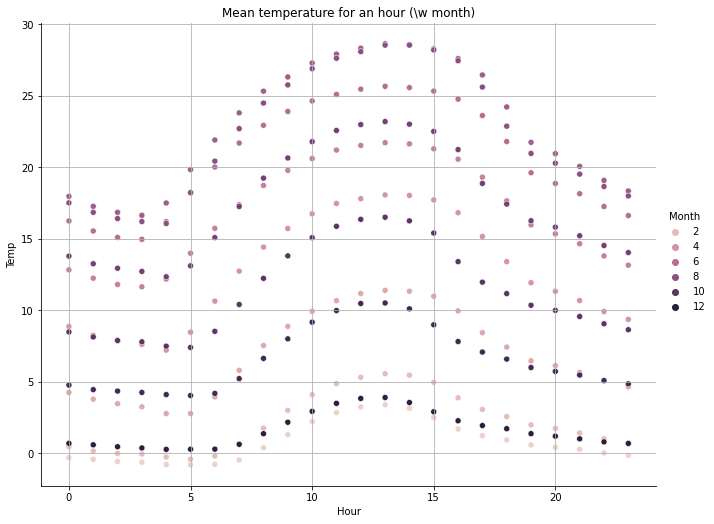

In [39]:
dfg_ = df.groupby(['Hour', 'Month'], as_index=False)['Temp'].mean()
sns.relplot(x='Hour', y='Temp', hue='Month', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for an hour (\w month)')
plt.grid()
plt.show()

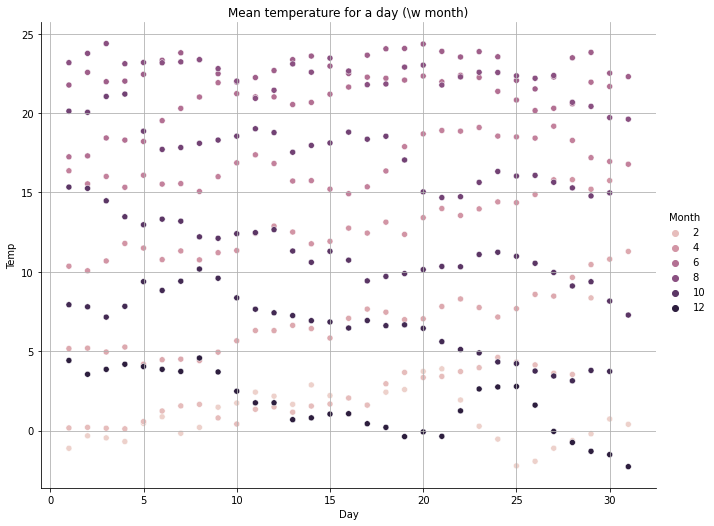

In [40]:
dfg_ = df.groupby(['Month', 'Day'], as_index=False)['Temp'].mean()
sns.relplot(x='Day', y='Temp', hue='Month', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a day (\w month)')
plt.grid()
plt.show()

На первом графике все понятно - с утра холодно, тем теплее, чем ближе к дню, а уже после снова похолодание. 

На втором графике я хотел посмотреть, как меняется средняя температура по дня для каждого месяца. К сожалению, тут не видно какой-то единой закономерности. Она есть для определенных месяцев, но такой признак я не знаю, как записать.

Теперь вспомним, что времена года асиметричны относительно полушарий. Например, в США зимой холодно, летом тепло, в то время как в ЮАРе - наоборот. Поэтому если мы обучим модель по данным из северных широт и протестируем на данных с южных, то мы поймем, что у модели плохая обобщающая способность.

Их можно было бы удалить, но я, пожалуй, оставлю, так как если я правильно понял, что мы делаем предсказания именно по той стране, в которой были собраны данные.

In [41]:
# df.drop(columns=['Month', 'Day'], inplace=True)

Лучшим вариантом было бы объединить день и месяц в один признак, потому что:

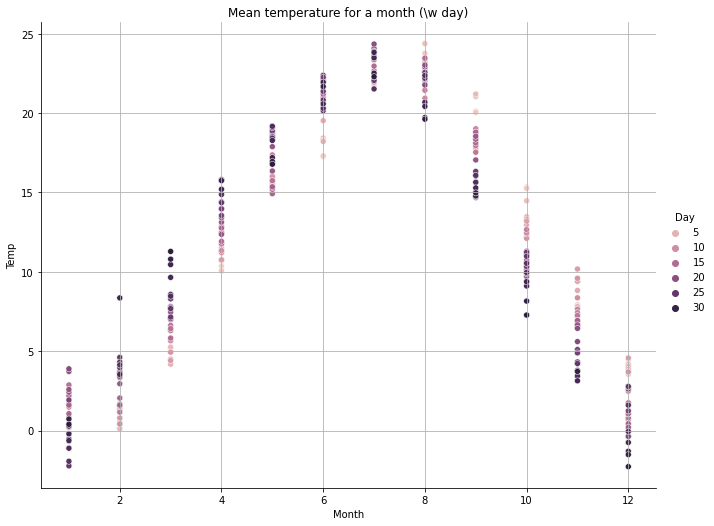

In [44]:
dfg_ = df.groupby(['Month', 'Day'], as_index=False)['Temp'].mean()
sns.relplot(x='Month', y='Temp', hue='Day', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a month (\w day)')
plt.grid()
plt.show()

Если мы рассматриваем какой-то день, то мы должны либо рассматривать его неразрывно с месяцем, либо рассматривать его как номер дня в году. Так мы и сделаем.

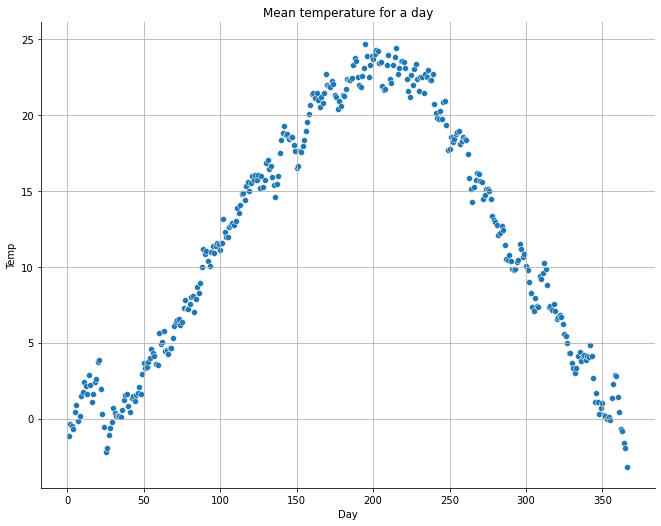

In [47]:
df['Day'] = df.Date.dt.dayofyear
dfg_ = df.groupby(['Day'], as_index=False)['Temp'].mean()
sns.relplot(x='Day', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a day')
plt.grid()
plt.show()

Посмотрим на корреляции с таргетом.

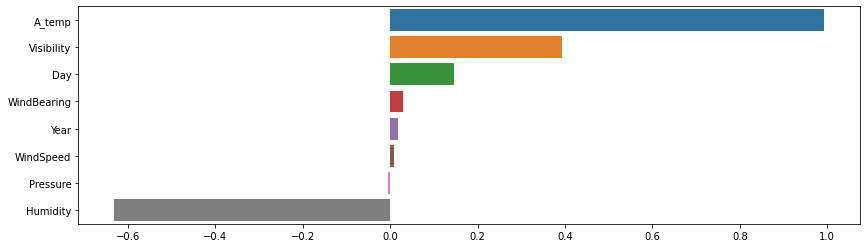

In [49]:
numeric_features = ['Humidity', 'WindSpeed', 'WindBearing', 'Visibility', 'Pressure', 'Day', 'Year']
correlations = df[numeric_features + ['A_temp']].corrwith(df.Temp).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(14, 4)

Заметим, что влияние температуры "как она ощущается" на температуру "as is" крайне высокое (корреляция почти 1). То есть, `Apparent Temperature` по сути является главным признаком. Однако я не особо понимаю принципы расчета таких значений и не могу сказать, корректно ли будет обучать модель по такому признаку, поскольку в чем тогда суть модели, если для нее по большей части нужен всего один признак? Возможно, логичнее было бы предсказать `Apparent Temperature` по фактической температуре, но это уже не наша задачу. Отмечу еще, что корреляции будут похожими, если мы переставим признак и целевую переменную местами:

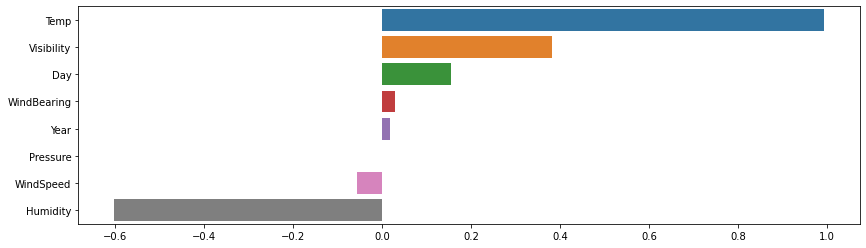

In [50]:
correlations = df[numeric_features + ['Temp']].corrwith(df.A_temp).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(14, 4)

Заметим, что `Apparent Temperature` не коррелирует с давлением. Это интересно. Также понятно, почему скорость ветра сильнее влияет на этот таргет. В любом случае, `Apparent Temperature` как признак я использовать не буду, ибо он слишком сильно "палит" целевую переменную.

Ради интереса посмотрим на распределение таргета. Как видим, выбросов не имеем.

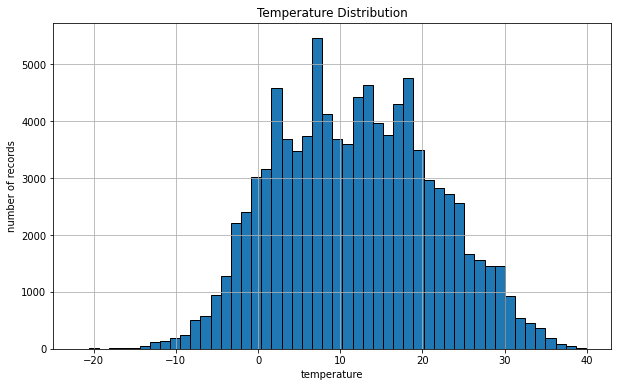

In [51]:
plt.rcParams['figure.figsize'] = 10, 6
plt.hist(df.Temp.values, bins=50, edgecolor = 'k')
plt.xlabel('temperature')
plt.ylabel('number of records')
plt.title('Temperature Distribution')
plt.grid()
plt.show()

Скорость метра обычно измеряется в метрах в секунду, поэтому я сделаю перевод.

In [52]:
df.WindSpeed = df.WindSpeed * 1000 / 3600
df.head()

,Date,Summary,Precip,Temp,A_temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Month,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,3.922139,251.0,15.8263,1015.13,22,90,3,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,3.962389,259.0,15.8263,1015.63,23,90,3,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,1.091222,204.0,14.9569,1015.94,0,91,4,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,3.917667,269.0,15.8263,1016.41,1,91,4,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,3.067944,259.0,15.8263,1016.51,2,91,4,2006


Удалим лишнее из таблицы.

In [57]:
df.drop(columns=['Date', 'Month', 'A_temp'], inplace=True)

**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

Возьмем следующие признаки:
* Давление. Если увеличивается температура воздуха, то давление уменьшается. Вообще температура фигурирует в формуле атмосферного давления, поэтому здесь точно имеется связь;
* Видимость. Видимость зависит, например, от тумана, туман - от температуры;
* Влажность. Температура влияет на максимальную абсолютную влажность воздуха;
* Направление ветра. См. ниже;
* Час. Утром прохладнее, чем днем;
* Год. Поправка на глобальное потепление - с каждым годом все теплее и теплее, так что нужно рассматривать год как числовой признак;
* Осадки. Писал об этом в предыдущем пункте;
* Прогноз (`Summary`). Тут понятно.

Признак скорости ветра не берем, и вот почему:\
*При субъективной оценке температуры по скорости теплопотерь кажется, что воздух при ветре холоднее. На самом деле – тоньше пограничный слой и выше теплопотери. Для термометра такой разницы нет. С ветром или без ветра, он покажет одну и ту же температуру воздуха.*\
Иными словами, скорость ветра влияет на ощущение температуры, а на саму температуру - нет.

Почему взято направление ветра: [туть](https://ru.wikipedia.org/wiki/Ветер#Глобальные_эффекты_ветрообразования). Можно сказать, что направление ветра характеризует определенный регион (который имеет определенный климат и определенные годовые температурные показатели). С этой точки зрения направление ветра может быть полезно как категориальный признак.

In [58]:
df.head()

,Summary,Precip,Temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Year
0,Partly Cloudy,rain,9.472222,0.89,3.922139,251.0,15.8263,1015.13,22,90,2006
1,Partly Cloudy,rain,9.355556,0.86,3.962389,259.0,15.8263,1015.63,23,90,2006
2,Mostly Cloudy,rain,9.377778,0.89,1.091222,204.0,14.9569,1015.94,0,91,2006
3,Partly Cloudy,rain,8.288889,0.83,3.917667,269.0,15.8263,1016.41,1,91,2006
4,Mostly Cloudy,rain,8.755556,0.83,3.067944,259.0,15.8263,1016.51,2,91,2006


In [59]:
dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
        "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
angle_part = 360 / len(dirs)

df.WindBearing = round(df.WindBearing / angle_part) % len(dirs)
df.WindBearing = df.WindBearing.apply(lambda x: dirs[int(x)  % len(dirs)])
df.head()

,Summary,Precip,Temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Year
0,Partly Cloudy,rain,9.472222,0.89,3.922139,WSW,15.8263,1015.13,22,90,2006
1,Partly Cloudy,rain,9.355556,0.86,3.962389,W,15.8263,1015.63,23,90,2006
2,Mostly Cloudy,rain,9.377778,0.89,1.091222,SSW,14.9569,1015.94,0,91,2006
3,Partly Cloudy,rain,8.288889,0.83,3.917667,W,15.8263,1016.41,1,91,2006
4,Mostly Cloudy,rain,8.755556,0.83,3.067944,W,15.8263,1016.51,2,91,2006


In [ ]:
numeric = ['Humidity', 'WindSpeed', 'Visibility', 'Pressure', 'Day', 'Year']
categorical = ['Precip', 'Hour', 'Summary', 'WindBearing']

**Пункт 2.** Изучите зависимости между зависимой переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в виде уравнения (например, в ячейке Markdown ниже) и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

### Часы
Как мы уже смотрели в предыдущем пункте, часы имеют квадратичную зависимость. То есть, по сути мы должны смотреть не на признак `Hour`, а на `(hour - 12) ** 2`. При всем при этом, мы должны поднять эту функцию на какой-то уровень, поэтому нам также нужен константный столбец.

### День
Аналогично с часами, сделаем квадратичную зависимость: `(day - 200) ** 2` + константный признак.

Теперь рассмотрим зависимости с остальными (числовыми) признаками.

### Влажность

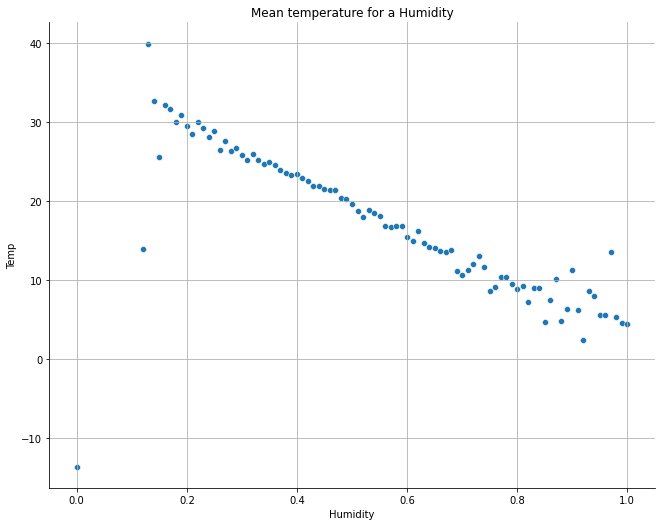

In [60]:
dfg_ = df.groupby(['Humidity'], as_index=False)['Temp'].mean()
sns.relplot(x='Humidity', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a Humidity')
plt.grid()
plt.show()

Зависимость чисто линейная отрицательная. Пойдет в модель просто как `Humidity`.

### Видимость

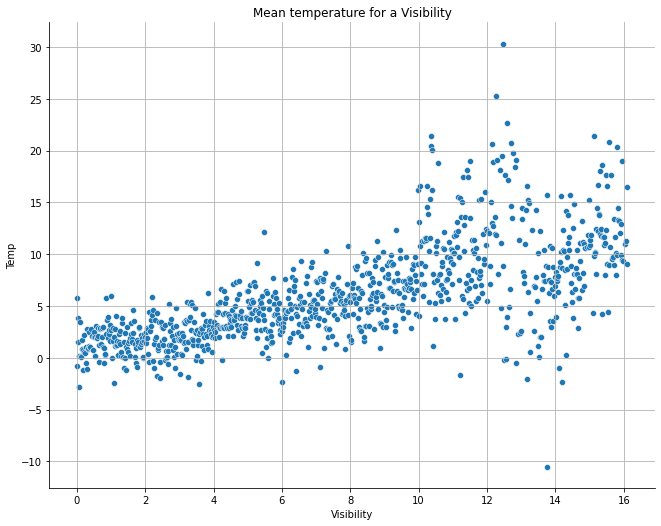

In [61]:
dfg_ = df.groupby(['Visibility'], as_index=False)['Temp'].mean()
sns.relplot(x='Visibility', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a Visibility')
plt.grid()
plt.show()

Зависимость линейная положительная. При этом мы видим, что имеется некоторая гетероскедастичность. Держим это в голове. Признак пойдем в модель как `Visibility`.

### Скорость ветра

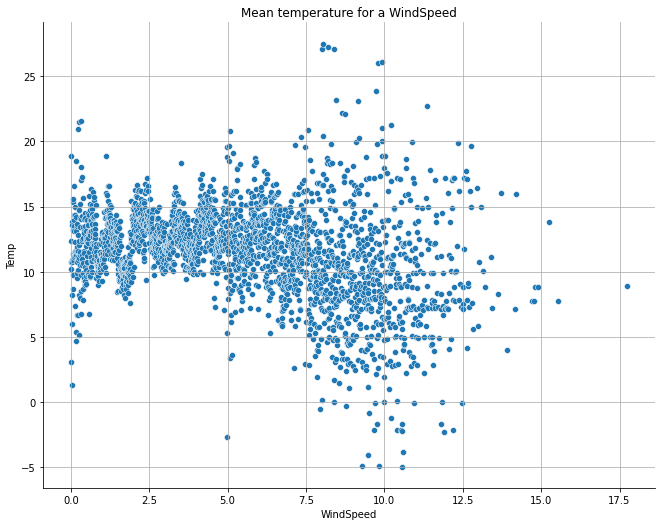

In [62]:
dfg_ = df.groupby(['WindSpeed'], as_index=False)['Temp'].mean()
sns.relplot(x='WindSpeed', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a WindSpeed')
plt.grid()
plt.show()

А скорость ветра мы никак не учитываем, так что нам ОК.

### Давление

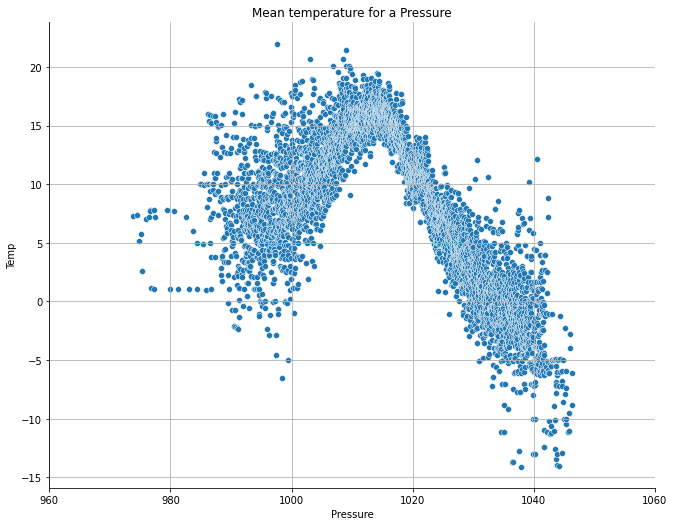

In [76]:
dfg_ = df.groupby(['Pressure'], as_index=False)['Temp'].mean()
sns.relplot(x='Pressure', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a Pressure')
plt.grid()
plt.xlim([960, 1060])
plt.show()

Здесь мы уже видим два линейных тренда. Предлагается разбить давление на два отрезка по порогу (примерно 1015). Добавим индикатор того, что давление меньше или равно 1015.

In [79]:
df['Pressure_ind'] = (df['Pressure'] <= 1015).astype(int)
df.head()

,Summary,Precip,Temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Year,Pressure_ind
0,Partly Cloudy,rain,9.472222,0.89,3.922139,WSW,15.8263,1015.13,22,90,2006,0
1,Partly Cloudy,rain,9.355556,0.86,3.962389,W,15.8263,1015.63,23,90,2006,0
2,Mostly Cloudy,rain,9.377778,0.89,1.091222,SSW,14.9569,1015.94,0,91,2006,0
3,Partly Cloudy,rain,8.288889,0.83,3.917667,W,15.8263,1016.41,1,91,2006,0
4,Mostly Cloudy,rain,8.755556,0.83,3.067944,W,15.8263,1016.51,2,91,2006,0


Тогда в этом случае признак `Pressure` войдет в модель так: +`Pressure * Pressure_ind` - `Pressure * (1 - Pressure_ind)`.
Таким образом, если у нас давление в первом промежутке - считаем как положительную линейную зависимость. Если иначе, то считаем как отрицательную линейную.

### Год

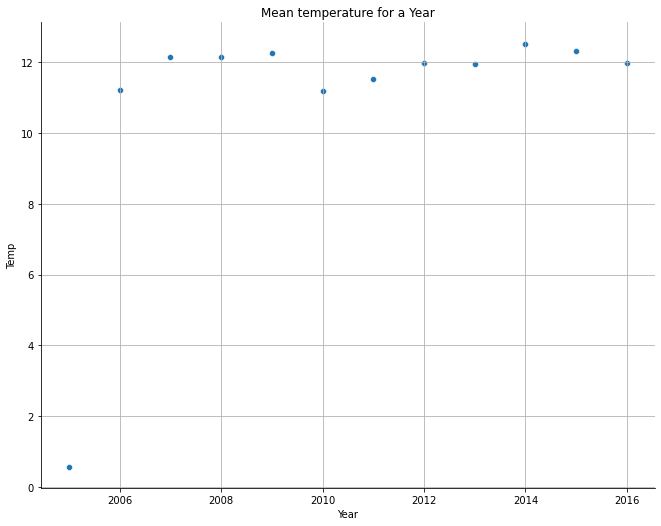

In [83]:
dfg_ = df.groupby(['Year'], as_index=False)['Temp'].mean()
sns.relplot(x='Year', y='Temp', data=dfg_, height=7, aspect=1.3)
plt.title('Mean temperature for a Year')
plt.grid()
plt.show()

Признаться, такая зависимость меня несколько расстроила. Не будем рассматривать год.

## Итог
Выпишем теперь вид нашей модели:\
Temp = const + Humidity + Visibility + Pressure * Pressure_ind - Pressure * (1 - Pressure_ind) + (Hour - 12) ** 2 + (Day - 200) ** 2 + Precip + Summary + WindBearing.\
Признаки будем кодировать с помощью `OrdinalEncoder`, для числовых стоит использовать `StandartScaler`, но для лучших объяснений в следующих заданиях пока не буду. Выбросов и тяжелых хвостов по таргету мы не имеем, поэтому логарифмировать не будем (для этого можно было бы перевести в Кельвины).

In [131]:
numeric = ['Humidity', 'Visibility', 'Pressure', 'Pressure_ind', 'Hour', 'Day']
categorical = ['Precip', 'Summary', 'WindBearing']

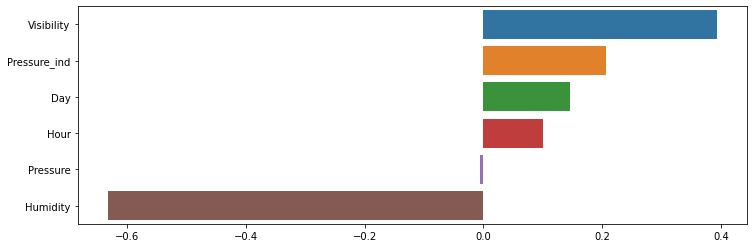

In [132]:
correlations = df[numeric].corrwith(df.Temp).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(12, 4)
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

encoded = OrdinalEncoder().fit_transform(df[categorical])
print(encoded.shape)
encoded = pd.DataFrame(columns=categorical, data=encoded)

# scaled = StandardScaler().fit_transform(df[numeric])
# scaled = pd.DataFrame(columns=numeric, data=scaled)

new_df = pd.concat([df[numeric], encoded], axis=1)
new_df.head()

(96453, 3)


,Humidity,Visibility,Pressure,Pressure_ind,Hour,Day,Precip,Summary,WindBearing
0,0.89,15.8263,1015.13,0,22,90,1.0,19.0,15.0
1,0.86,15.8263,1015.63,0,23,90,1.0,19.0,13.0
2,0.89,14.9569,1015.94,0,0,91,1.0,17.0,11.0
3,0.83,15.8263,1016.41,0,1,91,1.0,19.0,13.0
4,0.83,15.8263,1016.51,0,2,91,1.0,17.0,13.0


In [134]:
new_df['Temp'] = df.Temp
df.head(3)

,Summary,Precip,Temp,Humidity,WindSpeed,WindBearing,Visibility,Pressure,Hour,Day,Year,Pressure_ind,const
0,Partly Cloudy,rain,9.472222,0.89,3.922139,WSW,15.8263,1015.13,22,90,2006,0,1.0
1,Partly Cloudy,rain,9.355556,0.86,3.962389,W,15.8263,1015.63,23,90,2006,0,1.0
2,Mostly Cloudy,rain,9.377778,0.89,1.091222,SSW,14.9569,1015.94,0,91,2006,0,1.0


In [135]:
num_str = 'Humidity + Visibility + Pressure * Pressure_ind - Pressure * (Q(1) - Pressure_ind)'
time_str = ' + (Hour - Q(12)) ** 2 + (Day - Q(200)) ** 2'
cat_str = ' + Precip + Summary + WindBearing'
fstring = 'Temp ~ ' + num_str + time_str + cat_str
fstring

'Temp ~ Humidity + Visibility + Pressure * Pressure_ind - Pressure * (Q(1) - Pressure_ind) + (Hour - Q(12)) ** 2 + (Day - Q(200)) ** 2 + Precip + Summary + WindBearing'

**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

In [136]:
model_1 = smf.ols(fstring, data=new_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 1.719e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:01:30   Log-Likelihood:            -3.0837e+05
No. Observations:               96453   AIC:                         6.168e+05
Df Residuals:                   96443   BIC:                         6.169e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.3859      0.168    217.094      0.000      36.057      36.714
Humidity                -25.6117      0.107   -238.747      0.000     -25.822     -25.401
Visibility                0.2117      0.005     41.580      0.000       0.202       0.222
Pressure_ind              0.6621      0.169      3.921      0.000       0.331       0.993
Pressure:Pressure_ind     0.0024      0.000     14.249      0.000       0.002       0.003
Hour                     -0.0217      0.003     -7.783      0.000      -0.027      -0.016
Day                       0.0131      0.000     70.603      0.000       0.013       0.013
Precip                  -10.3723      0.064   -162.408      0.000     -10.497     -10.247
Summary                   0.0549      0.005     12.209      0.000       0.046       0.064
WindBearing              -0.0796      0.005    -16.824      0.000      -0.089      -0.070
==============================================================================
Omnibus:                      951.891   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.091
Skew:                          -0.222   Prob(JB):                    1.98e-204
Kurtosis:                       2.810   Cond. No.                     6.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Так как у нас `Prob (F-statistic)` - p-value по F-статистичке равно нулю, то регрессия в целом значима. Все регрессоры также значимы.

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентах в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

Опишу числовые признаки:
* Влажность влияет на целевую переменную сильнее всего, причем чем выше влажность, тем меньше температура. Повышение влажности на 1% влечет за собой понижение температуры на 0.256 градусов;
* Видимость имеет положительную корреляцию с целевой переменной, поэтому скорее всего видимость больше, если температура выше. В нашем случае каждый километр видимости имеет цену в +0.2117 градуса;
* Давление - не знаю, как комментировать;
* У часа и дня зависимость квадратичная. То, что стоит в таблице, мне кажется, должно стоять перед выражениями. Но это неточно.

**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

#### Во-первых, посмотрим на корреляцию числовых признаков друг с другом.

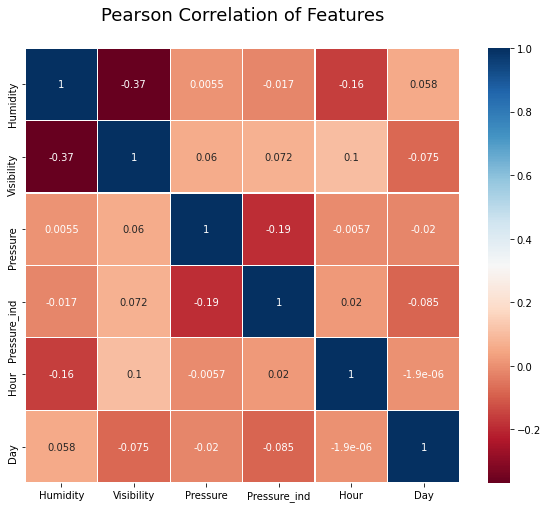

In [137]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(new_df[numeric].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Здесь у нас только корреляция между видимостью и влажностью. Еще есть не очень большая корреляция между часом и влажностью. Корреляцию между давлением и его индикатором не учитываем, ибо один получен из другого, и это важная конструкция в модели.

### Посмотрим на число обусловленности матрицы $X^TX$.

In [138]:
X = new_df.drop(columns='Temp').to_numpy()
np.linalg.cond(X.T @ X)

30580041.422075875

По сравнению с тем, что было на семинаре (8.396003693050826e+18), у нас получилось небольшое число.

### VIF.

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(new_df.shape[1]):
    print(list(new_df.columns)[i], variance_inflation_factor(model_1.model.exog, i))

Humidity 77.33241959709753
Visibility 1.210482169440678
Pressure 1.254638968786986
Pressure_ind 19.025763534028577
Hour 19.208620355690194
Day 1.0297447979035788
Precip 1.0569855399938388
Summary 1.1817802907995056
WindBearing 1.0605718017893604
Temp 1.0117920190618885


Видно, что значение `VIF` для самого первого регрессора (влажность) получился большим. Получается, что мы наблюдаем мультиколлинеартность относительно данного регрессора.

В нашем случае было бы плохой идеей выкидывать регрессоры, так как они все в той или иной мере физически связаны друг с другом.

Немного поэксперементировав, я увидел, что можно выкинуть признак `Summary` (что меня удивило) и `WindBearing`. Кроме того, признак часа, как оказалось, вообще не влияет на $R^2$. Остальные признаки мы уже не можем выкинуть.

In [200]:
num_str = 'Humidity + Visibility + Pressure * Pressure_ind - Pressure * (Q(1) - Pressure_ind)'
time_str = ' + (Day - Q(200)) ** 2'
cat_str = ' + Precip'
fstring = 'Temp ~ ' + num_str + time_str + cat_str


model_2 = smf.ols(fstring, data=new_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 2.557e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:35:55   Log-Likelihood:            -3.0861e+05
No. Observations:               96453   AIC:                         6.172e+05
Df Residuals:                   96446   BIC:                         6.173e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.4437      0.141    259.250      0.000      36.168      36.719
Humidity                -25.6326      0.106   -240.931      0.000     -25.841     -25.424
Visibility                0.2123      0.005     41.745      0.000       0.202       0.222
Pressure_ind              0.3136      0.168      1.871      0.061      -0.015       0.642
Pressure:Pressure_ind     0.0027      0.000     16.306      0.000       0.002       0.003
Day                       0.0131      0.000     70.261      0.000       0.013       0.013
Precip                  -10.3963      0.064   -162.630      0.000     -10.522     -10.271
==============================================================================
Omnibus:                      952.817   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.255
Skew:                          -0.222   Prob(JB):                    1.82e-204
Kurtosis:                       2.809   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Заметим, что p-value у индикатора давления говорит о том, что он значим не на всех разумных уровнял значимости. Если мы сделаем так, то получим $R^2$ получше:

In [205]:
num_str = 'Humidity + Visibility + Pressure'
time_str = ' + (Day - Q(200)) ** 2'
cat_str = ' + Precip'
fstring = 'Temp ~ ' + num_str + time_str + cat_str


model_2 = smf.ols(fstring, data=new_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 2.780e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:37:14   Log-Likelihood:            -3.1149e+05
No. Observations:               96453   AIC:                         6.230e+05
Df Residuals:                   96447   BIC:                         6.230e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6365      0.216    178.905      0.000      38.213      39.060
Humidity     -25.2940      0.110   -230.955      0.000     -25.509     -25.079
Visibility     0.2305      0.005     44.055      0.000       0.220       0.241
Pressure      -0.0003      0.000     -1.761      0.078      -0.001    3.35e-05
Day            0.0115      0.000     60.133      0.000       0.011       0.012
Precip       -11.1259      0.065   -170.817      0.000     -11.254     -10.998
==============================================================================
Omnibus:                     1289.619   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.648
Skew:                          -0.231   Prob(JB):                    7.73e-259
Kurtosis:                       2.714   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Посмотрим, как изменился `VIF`.

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feat = ['Humidity', 'Visibility', 'Pressure', 'Day', 'Precip']
for i in range(new_df[feat].shape[1]):
    print(feat[i], variance_inflation_factor(model_2.model.exog, i))

Humidity 120.35745034869696
Visibility 1.1826985975489563
Pressure 1.2414173447546362
Day 1.0051132339891165
Precip 1.0428849819945987


Так мы получили только еще более высокое значение для влажности, поэтому я предлагаю оставить предыдущий вариант:

In [215]:
num_str = 'Humidity + Visibility + Pressure * Pressure_ind - Pressure * (Q(1) - Pressure_ind)'
time_str = ' + (Day - Q(200)) ** 2'
cat_str = ' + Precip'
fstring = 'Temp ~ ' + num_str + time_str + cat_str


model_2 = smf.ols(fstring, data=new_df).fit()
model_2.summary()

from statsmodels.stats.outliers_influence import variance_inflation_factor

feat = ['Humidity', 'Visibility', 'Pressure',  'Pressure_ind', 'Day', 'Precip']
for i in range(new_df[feat].shape[1]):
    print(feat[i], variance_inflation_factor(model_2.model.exog, i))

Humidity 54.126154577569295
Visibility 1.184587875699775
Pressure 1.2446466988967295
Pressure_ind 18.648615535100312
Day 18.72658238646347
Precip 1.056328540226825


**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

Стоит отметить, что большая доля дисперсии (40%) объясняется имеено признаками видимости и влажности. Остальные вносят 3-5% в зависимости от способа кодирования категориальных признаков.

### Goldfeld-Quandt test

In [216]:
sms.het_goldfeldquandt(model_1.model.endog, model_1.model.exog, alternative='increasing')

(1.011534929982176, 0.10398331826276806, 'increasing')

p-value равно 0.104, поэтому здесь вероятно есть гетероскедастичность.

### Breusch-Pagan test

In [217]:
sms.het_breuschpagan(model_1.model.endog, model_1.model.exog)

(50558.780204760405, 0.0, 11805.021927579739, 0.0)

p-value для LM-статистики нулевое (второе по счету значение), значит, тест выявил гетероскедастичность.

### Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)

In [218]:
sms.het_arch(model_1.model.endog)

(94497.80076982286, 0.0, 71945.98097364364, 0.0)

Аналогично - выявлена гетероскедастичность.

Таким образом, по результатам трех тестов считаем, мы у нас имеется гетероскедостичность.

In [220]:
model_1_hc = smf.ols(fstring, data=new_df).fit(cov_type='HC0')
model_1_hc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 3.044e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:40:43   Log-Likelihood:            -3.0861e+05
No. Observations:               96453   AIC:                         6.172e+05
Df Residuals:                   96446   BIC:                         6.173e+05
Df Model:                           6                                         
Covariance Type:                  HC0                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.4437      0.151    241.549      0.000      36.148      36.739
Humidity                -25.6326      0.118   -217.333      0.000     -25.864     -25.401
Visibility                0.2123      0.005     42.104      0.000       0.202       0.222
Pressure_ind              0.3136      0.173      1.812      0.070      -0.026       0.653
Pressure:Pressure_ind     0.0027      0.000     15.828      0.000       0.002       0.003
Day                       0.0131      0.000     71.487      0.000       0.013       0.013
Precip                  -10.3963      0.066   -156.994      0.000     -10.526     -10.266
==============================================================================
Omnibus:                      952.817   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.255
Skew:                          -0.222   Prob(JB):                    1.82e-204
Kurtosis:                       2.809   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 2.557e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:41:10   Log-Likelihood:            -3.0861e+05
No. Observations:               96453   AIC:                         6.172e+05
Df Residuals:                   96446   BIC:                         6.173e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                36.4437      0.141    259.250      0.000      36.168      36.719
Humidity                -25.6326      0.106   -240.931      0.000     -25.841     -25.424
Visibility                0.2123      0.005     41.745      0.000       0.202       0.222
Pressure_ind              0.3136      0.168      1.871      0.061      -0.015       0.642
Pressure:Pressure_ind     0.0027      0.000     16.306      0.000       0.002       0.003
Day                       0.0131      0.000     70.261      0.000       0.013       0.013
Precip                  -10.3963      0.064   -162.630      0.000     -10.522     -10.271
==============================================================================
Omnibus:                      952.817   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.255
Skew:                          -0.222   Prob(JB):                    1.82e-204
Kurtosis:                       2.809   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Я выбрал `HC0`-метод корректировки доверительных интервалов, так как `HC3` вылетает по памяти куда-то в астрал. Тем не менее, доверительные интервалы в основном немного сузились, а p-value для индикатора давления возросло. 

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

Нет, особо ничего не изменилось, но по нашей модели мы будем считать, что основные факторы - `Humidity`, `Visibility`, `Pressure`, `Day`, `Precip`.

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = new_df.drop(columns='Temp')
y = new_df['Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [276]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error as mae

numeric = ['Humidity', 'Visibility', 'Pressure', 'Pressure_ind', 'Hour', 'Day']
categorical = ['Precip', 'Summary', 'WindBearing']

md = LinearRegression().fit(X_train, y_train)
y_train_pred = md.predict(X_train)
train_error = mae(y_train, y_train_pred)

y_test_pred = md.predict(X_test)
test_error = mae(y_test, y_test_pred)
print('Train MAE = %.4f' % train_error)
print('Test MAE = %.4f' % test_error)

Train MAE = 4.8283
Test MAE = 4.8225


**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

Чтобы проверить, значима ли модель в целом, возьмем и прямо сравним ее с константной. Как известно, оптимальное значение константы для MAE - медиана.

In [277]:
const = np.median(y_train)
print('Trivial Test MAE = %.4f' % mae(y_test, [const for _ in range(len(y_test))]))

Trivial Test MAE = 7.8897


Очевидно, модель получилась намного лучше константной, а значит, она значима в целом. О значимости отдельных коэффициентов, увы, не знаю, что сказать.

**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

In [313]:
# from statsmodels.regression.linear_model import OLS as linear_ols
# model_ols = linear_ols(y_train, X_train).fit()
# model_ols.params

In [314]:
# model_ols.tvalues

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.

## Задача 2: "Борьба с гетероскедастичностью" (5 баллов).

Рассмотрим линейную регрессионную модель

$$y_i = 10+2x_i+\varepsilon_i$$

$$x_i \sim N(40, 4)$$

$$\varepsilon_i \sim N(0,x_i^2)$$

**Пункт 1.** Сгенерируйте выборку размера $n=50$. Оцените модель с помощью МНК. Прокомментируйте значимость регрессоров и проверьте  модель на гетероскедастичность при помощи вашего любимого теста. 

In [308]:
X = np.random.normal(40, 4, 50)
Eps = np.random.normal(0, X ** 2, 50)
y = 10 + 2 * X + Eps

In [309]:
data = pd.DataFrame(columns=['y', 'x'])
data['y'] = y
data['x'] = X

model_1 = smf.ols('y ~ x', data=data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2609
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.612
Time:                        22:40:41   Log-Likelihood:                -434.81
No. Observations:                  50   AIC:                             873.6
Df Residuals:                      48   BIC:                             877.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1056.7116   2188.698     -0.483      0.631   -5457.383    3343.960
x             27.7841     54.398      0.511      0.612     -81.591     137.159
==============================================================================
Omnibus:                        2.212   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.346
Skew:                           0.187   Prob(JB):                        0.510
Kurtosis:                       3.712   Cond. No.                         422.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Получаем, что модель незначима в целом; регрессор x не значим в целом на любом разумном уровне значимости.

In [310]:
sms.het_arch(model_1.model.endog)

(12.130613239041246,
 0.35390598922537697,
 1.1081436971982148,
 0.3923929472463033)

Нулевая гипотеза отвергается (смотрим по p-value - очень далеко от 0), поэтому имеем гетероскедастичность.

**Пункт 2.** Оцените модель с помощью WLS и выведите стандартные ошибки коэффициентов, устойчивые к гетероскедастичности. Сравните результаты оценки с результатами предыдущего пункта.

**Hint:** [о WLS и его связи с FGLS](https://en.wikipedia.org/wiki/Generalized_least_squares). 

In [312]:
from statsmodels.regression.linear_model import OLS, WLS

log_resid = np.log(model_1.resid ** 2)
hat_omega_model = OLS(log_resid, model_1.model.exog).fit()
weights = 1 / np.exp(model_1.model.exog @ hat_omega_model.params)

model_gls = WLS(model_1.model.endog, model_1.model.exog, weights=weights).fit()
model_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            WLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.977
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.166
Time:                        22:41:48   Log-Likelihood:                -431.76
No. Observations:                  50   AIC:                             867.5
Df Residuals:                      48   BIC:                             871.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2385.9751   1652.705     -1.444      0.155   -5708.962     937.012
x1            62.6909     44.592      1.406      0.166     -26.967     152.349
==============================================================================
Omnibus:                        1.948   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.084
Skew:                           0.211   Prob(JB):                        0.582
Kurtosis:                       3.585   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value значительно уменьшилось, также изменились и доверительные интервалы (значительно сузились). Коэффициенты, кстати, возросли.

**Пункт 3.** Повторите действия 1-2 пунктов $n=10000$. Прокомментируйте, почему поменялись или не поменялись результаты оценки моделей.

**Пункт 4.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какого-нибудь метода бутстрэпа. Сравните результаты оценки с результатами предыдущего пункта.

**Пункт 5.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какой-нибудь из схем HC. Поменялось ли что-нибудь?

**Пункт 6.** Сделайте итоговый вывод о значимости коэффициентов в модели. Очевиден ли он?